## Question 1

1. What is the printed message of the code below? (Ans: C)

```python
####################
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 1, 2])
z = 3.5*x + y*(1-x)

print(z[2])
####################
```

    A. 1.0
    B. 3.5
    C. 6.0
    D. 6.5

**Solution:**

In [7]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([1, 2, 1, 2])

# Print the workings step-by-step so that you can explore and understand
# how the numpy array operations, broadcasting, methods and slicing work.
print(3.5*x)
print(1-x)
print(y*(1-x))
print(3.5*x + y*(1-x))
z = (3.5*x + y*(1-x))
print(z[2])

[ 0.   3.5  7.  10.5]
[ 1  0 -1 -2]
[ 1  0 -1 -4]
[1.  3.5 6.  6.5]
6.0


2. What is the printed message of the code below? (Ans: D)

```python
####################
import numpy as np

an_array = np.array([[1, 2], 
                     [3, 4]])
result = an_array.sum() - an_array.sum(axis=1)
print(result)
####################
```

    A. 0
    B. [1, -1]
    C. [6, 4]
    D. [7, 3]
    
**Solution:**

In [6]:
import numpy as np

an_array = np.array([[1, 2], 
                     [3, 4]])

# Print the workings step-by-step so that you can explore and understand
# how the numpy array operations, broadcasting, methods and slicing work.
print(an_array.sum())
print(an_array.sum(axis=1))
result = an_array.sum() - an_array.sum(axis=1)
print(result)

10
[3 7]
[7 3]


3. What is the printed message of the code below? (Ans: D)

```python
####################
import numpy as np

x = np.array([[1, 2],    
              [2, 3.5],     
              [5, 6.5]])
y = np.array([1, 0.5])
z = x.max() - (x*y).sum(axis=0)

print(z[0])
####################
```

    A. 1.5
    B. 0.5
    C. -0.5
    D. -1.5
    
**Solution:**

In [5]:
import numpy as np

x = np.array([[1, 2],    
              [2, 3.5],     
              [5, 6.5]])
y = np.array([1, 0.5])

# Print the workings step-by-step so that you can explore and understand
# how the numpy array operations, broadcasting, methods and slicing work.
print(x.max())
print(x*y)
print((x*y).sum(axis=0))
print(x.max() - (x*y).sum(axis=0))
z = x.max() - (x*y).sum(axis=0)
print(z[0])

6.5
[[1.   1.  ]
 [2.   1.75]
 [5.   3.25]]
[8. 6.]
[-1.5  0.5]
-1.5


---

## Question 2

PUBG is an online game where $n$ players tries to kill each others and the final survivor is the winner. If each player is equally good, we can prove that the expected number of kills made by the winner is $1 + 1/2 + 1/3 + ... + 1/(n-1)$.

1. What is expected number of kills if there are a total of $n=60$ players?

**Solution:**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

n = 60
array = np.arange(1, n)    # Create the fractions.
fractions = 1 / array    # Broadcasting occurs here on the value 1.

expected_value = fractions.sum()    # Sum over all the fractions.

expected_value

4.66320374628507

2i. Visualize the expected number of kills under different numbers of players from $n=2$ to $n=60$. You may use a `for`-loop.

**Solution:**

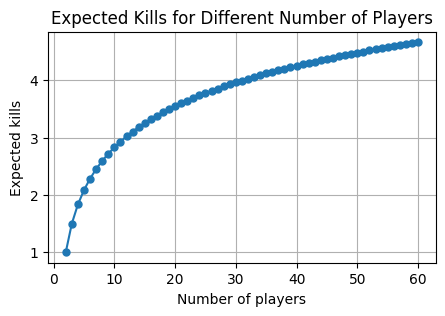

In [11]:
# Method with a for-loop

n_players = np.arange(2, 61)
expected_values = []

for n in n_players:
    array = np.arange(1, n)    # Create the fractions.
    fractions = 1 / array    # Broadcasting occurs here on the value 1.
    expected_value = fractions.sum()    # Sum over all the fractions.
    expected_values.append(expected_value)    # Append the sum to the `expected_values` list.

plt.figure(figsize=(5,3))
plt.plot(n_players, expected_values, marker='o', markersize=5)
plt.title("Expected Kills for Different Number of Players")
plt.xlabel('Number of players')
plt.ylabel('Expected kills')
plt.grid()
plt.show()

2ii. Visualize the expected number of kills under different numbers of players from $n=2$ to $n=60$, without using a `for`-loop.

_**Hint:** You may use the docstring of the `cumsum()` function from the NumPy package to explore using it for calculating the cumulative sum of data items in a NumPy array._

**Solution:**

In [12]:
help(np.cumsum)

Help on function cumsum in module numpy:

cumsum(a, axis=None, dtype=None, out=None)
    Return the cumulative sum of the elements along a given axis.
    
    Parameters
    ----------
    a : array_like
        Input array.
    axis : int, optional
        Axis along which the cumulative sum is computed. The default
        (None) is to compute the cumsum over the flattened array.
    dtype : dtype, optional
        Type of the returned array and of the accumulator in which the
        elements are summed.  If `dtype` is not specified, it defaults
        to the dtype of `a`, unless `a` has an integer dtype with a
        precision less than that of the default platform integer.  In
        that case, the default platform integer is used.
    out : ndarray, optional
        Alternative output array in which to place the result. It must
        have the same shape and buffer length as the expected output
        but the type will be cast if necessary. See :ref:`ufuncs-output-type` for

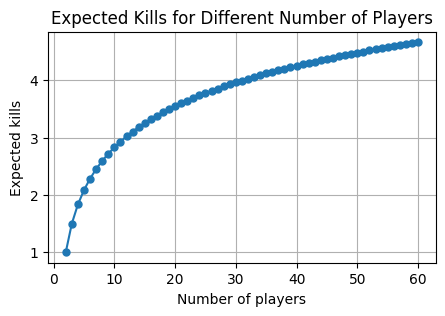

In [13]:
# Method without a for-loop, using the NumPy's `cumsum` function.

n = 60
array = np.arange(1, n)    # Create the fractions.
fractions = 1 / array    # Broadcasting occurs here on the value 1.

expected_values = np.cumsum(fractions)    # Use NumPy's `cumsum` function to calculate the cumulative sums.

n_players = np.arange(2, n+1)
plt.figure(figsize=(5,3))
plt.plot(n_players, expected_values, marker='o', markersize=5)
plt.title("Expected Kills for Different Number of Players")
plt.xlabel('Number of players')
plt.ylabel('Expected kills')
plt.grid()
plt.show()

---

## Question 3

Consider a naturally occurring collection of numbers, such as the GDP of all countries in a given year, or the financial data of a company. What should the distribution of the first digit of these numbers be? 

Our first intuition may tell us that all digits should have equal probability to appear, thus following a uniform distribution. However, the [Benford's law](https://en.wikipedia.org/wiki/Benford%27s_law) suggests that smaller digits have a higher probability to occur. Let $d$ be the first digit, then the occurring probability $p$ can be approximately expressed by
$$
p = \log_{10}\left(1 + \frac{1}{d}\right), ~~ d=1, 2, ..., 9
$$

In this exercise, we are using data visualization to verify that the GDP of different countries in a particular year roughly follows the equation given by the Benford's law. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

gdp = pd.read_csv('gdp.csv')    # Read the dataset.
gdp

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.615084e+09,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.310056e+09,2.496648e+09,NaN
1,Africa Eastern and Southern,AFE,2.129059e+10,2.180847e+10,2.370702e+10,2.821004e+10,2.611879e+10,2.968217e+10,3.223912e+10,3.351455e+10,...,9.730435e+11,9.839370e+11,1.003679e+12,9.242525e+11,8.823551e+11,1.020647e+12,9.910223e+11,9.975340e+11,9.216459e+11,1.082096e+12
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,1.583259e+10,1.442604e+10,...,7.275704e+11,8.207927e+11,8.649905e+11,7.607345e+11,6.905464e+11,6.837487e+11,7.416899e+11,7.945430e+11,7.844457e+11,8.358084e+11
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.249982e+11,1.334016e+11,1.372444e+11,8.721929e+10,4.984049e+10,6.897276e+10,7.779294e+10,6.930910e+10,5.361907e+10,7.254699e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.007159e+09
262,"Yemen, Rep.",YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.540134e+10,4.041524e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,2.188761e+10,1.884051e+10,2.106169e+10
263,South Africa,ZAF,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,1.421139e+10,1.582139e+10,...,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11,4.199464e+11
264,Zambia,ZMB,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,1.264286e+09,1.368000e+09,...,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.120306e+10


1. In the first step, we select one year, 2010, from the dataset. Please note that the GDP for some countries are missing, and we will ignore them in the subsequent analysis. 

**Solution**:

In [2]:
year = 2010    # Choose a year.
gdp_yearly = gdp[str(year)].dropna()    # Drop all the null values.
gdp_yearly

0      2.453631e+09
1      8.604783e+11
2      1.585668e+10
3      5.915958e+11
4      8.169956e+10
           ...     
261    5.344014e+09
262    3.090675e+10
263    4.173651e+11
264    2.026556e+10
265    1.204166e+10
Name: 2010, Length: 256, dtype: float64

2. The next step is to retrieve the first digit of the GDP numbers, and calculate the counts (or percentage) of cases with each of the first digits.

**Solution**:

In [3]:
# Convert all gdp numerical values to strings.
gdp_str = gdp_yearly.astype(str)
gdp_str

0       2453631284.9162
1      860478348236.464
2       15856678596.148
3      591595778367.133
4      81699556136.6643
             ...       
261    5344014317.91065
262     30906749533.221
263    417365076968.257
264    20265559483.8548
265       12041655200.0
Name: 2010, Length: 256, dtype: object

In [4]:
# Take the first character of each string and convert it back to an integer.
first_digit = gdp_str.str[0].astype(int)
first_digit

0      2
1      8
2      1
3      5
4      8
      ..
261    5
262    3
263    4
264    2
265    1
Name: 2010, Length: 256, dtype: int64

In [5]:
# Use the `value_counts` method of pandas series to get the distribution of the digits.
first_digit_p = first_digit.value_counts(normalize=True)
first_digit_p

1    0.312500
2    0.199219
4    0.109375
3    0.089844
5    0.082031
6    0.070312
7    0.054688
9    0.050781
8    0.031250
Name: 2010, dtype: float64

3. In this section, we use the equation of Benford's law to calculate the corresponding probability <code>p</code> for all possible first digits <code>d</code>. Note that <code>d</code> can be written as an array running from 1 to 9, and the probability <code>p</code> can be calculated by applying the equation to all elements in the array.

**Solution**:

In [27]:
# Print the theoretical distribution of the first digits using Benford's law.

d = np.arange(1, 10)
p = np.log10(1 + 1/d)    # Broadcasting occurs here on the two values of 1.

print(d)
print(p)
print(p.sum())    # Sum over all the probabilities.

[1 2 3 4 5 6 7 8 9]
[0.30103    0.17609126 0.12493874 0.09691001 0.07918125 0.06694679
 0.05799195 0.05115252 0.04575749]
0.9999999999999999


4. On the same visualization, plot:
- the curve of the theoretical probability distribution given by the Benford's law using a line graph (with red square markers representing the points and a red line connecting the markers), and
- the actual distribution of the first digit of GDP numbers using a vertical bar chart (with blue bars),

so that we can compare the two for verifying the Benford's law.

**Solution**:

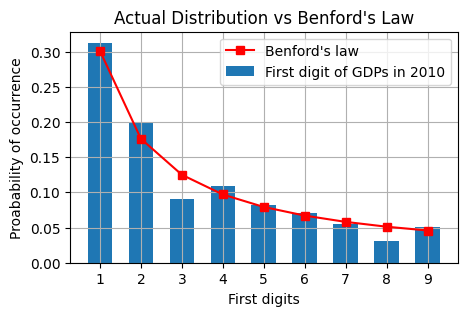

In [28]:
plt.figure(figsize=(5,3))

# Plot a line graph for the theoretical distribution.
plt.plot(d, p, marker='s', color='r', label="Benford's law")

# Plot a bar chart for the actual distribution.
plt.bar(d, first_digit_p[d], width=0.6, label=f'First digit of GDPs in {year}')

plt.title("Actual Distribution vs Benford's Law")
plt.xticks(d)
plt.xlabel('First digits')
plt.ylabel('Proabability of occurrence')
plt.legend()
plt.grid()
plt.show()

You may change the selected years and re-run the program above, you would find that each bar graph roughly matches the Benford's law curve. You are encouraged to download other natural number datasets, such as the global population or the financial data for some companies, to further verify this law. 

### Applications

In fact, the Benford's law was once used to detect the fraudulent financial data of Enron in 2000.

<img src="https://si.wsj.net/public/resources/images/NA-CD776_NUMBER_9U_20141205130308.jpg" width=600pt>

5. On the same visualization:
- shade with orange colour the area between the x-axis and the curve of the theoretical probability distribution given by the Benford's law, and
- plot the actual distribution of the first digit of GDP numbers using a line graph (with black circle markers representing the points and black dashed line connecting the markers),

so that your visualization will be similar in style as the one shown above.

_**Hint:** You may use the docstring of `matplotlib.pyplot`'s `fill_between` function to explore using it to shade the area between the x-axis and a curve._

**Solution**:

In [15]:
help(plt.fill_between)

Help on function fill_between in module matplotlib.pyplot:

fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)
    Fill the area between two horizontal curves.
    
    The curves are defined by the points (*x*, *y1*) and (*x*,
    *y2*).  This creates one or multiple polygons describing the filled
    area.
    
    You may exclude some horizontal sections from filling using *where*.
    
    By default, the edges connect the given points directly.  Use *step*
    if the filling should be a step function, i.e. constant in between
    *x*.
    
    Parameters
    ----------
    x : array (length N)
        The x coordinates of the nodes defining the curves.
    
    y1 : array (length N) or scalar
        The y coordinates of the nodes defining the first curve.
    
    y2 : array (length N) or scalar, default: 0
        The y coordinates of the nodes defining the second curve.
    
    where : array of bool (length N), optional
        Define *

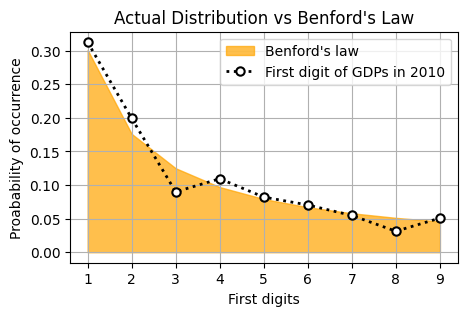

In [29]:
plt.figure(figsize=(5, 3))

plt.fill_between(d, p, color='orange', alpha=0.7, label="Benford's law")

# Plot a line graph on the actual distribution.
plt.plot(d, first_digit_p[d], color='k', linewidth=2, linestyle=':',
         marker='o', markeredgewidth=1.5, markerfacecolor='w',
         label=f'First digit of GDPs in {year}')

plt.title("Actual Distribution vs Benford's Law")
plt.xticks(d)
plt.xlabel('First digits')
plt.ylabel('Proabability of occurrence')
plt.legend()
plt.grid()
plt.show()

---

## Question 4

The dataset `wage` provides information on a number of working individuals in the year of 1976.

In [17]:
import pandas as pd

wage = pd.read_csv('wage.csv')
wage

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,F,False
1,3.24,12.0,22.0,F,True
2,3.00,11.0,2.0,M,False
3,6.00,8.0,44.0,M,True
4,5.30,12.0,7.0,M,True
...,...,...,...,...,...
521,15.00,16.0,14.0,F,True
522,2.27,10.0,2.0,F,False
523,4.67,15.0,13.0,M,True
524,11.56,16.0,5.0,M,True


Use histograms to compare the distributions of wages of male workers and female workers. Note that to make a fair comparison, we need to 
- use the same width of bins for the two histograms, and
- use the bar heights to represent the proportions of data occurrences instead of the actual counts.  

_**Hint:** You may use the docstring of the `hist()` function to explore how to specify the width of bins._

**Solution**:

In [18]:
male = wage.loc[wage["gender"] == "M"]    # Subset of the wage dataset for males.
female = wage.loc[wage["gender"] == "F"]    # Subset of the wage dataset for females.
wage.describe()    # Explore the statistics of the numerical columns.

,wage,educ,exper
count,526.000000,526.000000,526.00000
mean,5.896103,12.562738,17.01711
std,3.693086,2.769022,13.57216
min,0.530000,0.000000,1.00000
25%,3.330000,12.000000,5.00000
50%,4.650000,12.000000,13.50000
75%,6.880000,14.000000,26.00000
max,24.980000,18.000000,51.00000


In [19]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

As described in the docstring of the `hist` function, the width of the bins can be specified using the `bins` argument.

```
    bins : int or sequence or str, default: :rc:`hist.bins`
        If *bins* is an integer, it defines the number of equal-width bins
        in the range.
    
        If *bins* is a sequence, it defines the bin edges, including the
        left edge of the first bin and the right edge of the last bin;
        in this case, bins may be unequally spaced.  All but the last
        (righthand-most) bin is half-open.  In other words, if *bins* is::
    
            [1, 2, 3, 4]
    
        then the first bin is ``[1, 2)`` (including 1, but excluding 2) and
        the second ``[2, 3)``.  The last bin, however, is ``[3, 4]``, which
        *includes* 4.
    
        If *bins* is a string, it is one of the binning strategies
        supported by `numpy.histogram_bin_edges`: 'auto', 'fd', 'doane',
        'scott', 'stone', 'rice', 'sturges', or 'sqrt'.
```

Therefore, we can specify the bins and bin width of these two histograms using an array.

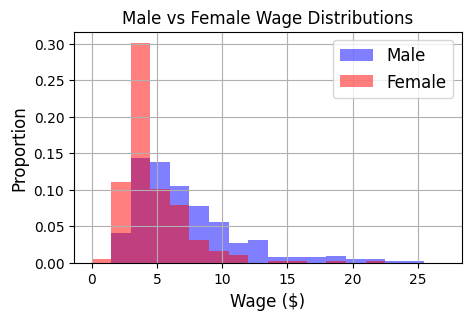

In [21]:
plt.figure(figsize=(5, 3))

# Create the bins for the histogram that will be used for 
# the male wage distribution and the female wage distribution.
# Note that the minimum bin value is not greater than the miminum wage 
# and the maximum bin value is not smaller than the maximum wage so that
# our histgraph will take into account all the wages in the wage dataset.
bins = np.arange(0, 28, 1.5)

# Plot the histogram for male wages.
# Set `density` = True so that the bar heights represent the 
# proportions of data occurences instead of the actual counts.
plt.hist(male["wage"], bins=bins, density=True, color="b", alpha=0.5, label="Male")

# Plot the histogram for female wages.
# Set `density` = True so that the bar heights represent the 
# proportions of data occurences instead of the actual counts.
plt.hist(female["wage"], bins=bins, density=True, color="r", alpha=0.5, label="Female")

plt.title("Male vs Female Wage Distributions")
plt.xlabel("Wage ($)", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()